## Cvičení o lesních požárech
* Představ si, že jsi ambasador OSN pro klimatické změny.
* Máš to těžké, protože buď stojíš proti zájmům miliónů nebo nesmírně mocným korporacím.
* Klimatické změny jsou také nesporně spojeny s extrémním počasím.
* Jedním z tvých cílů je najít oblasti, kde i změna z tvé slabé pozice je možná a bude mít velký účinek.
* Názorným extrémem je narůstající počet a intenzita lesních požárů ve světě.
* Tak tě napadlo. Jistý podíl požárů je způsoben žháři.
* Místo změny klimatu přímo, najděme země, ve kterých nejsou proti žhářům dostatečně tvrdí, zabili bychom jednou ranou dvě mouchy
    * ubyde žhářů
    * zachráníme životy lidí a zvířat
    * ušetříme peníze
    * neuvolníme CO2 a klimatu
* Tomu se říká synergie.

## V tomto cvičení se pokusíme identifikovat státy které potencionálně trpí přemírou žhářství.

---
---
# Pokud je toto tvůj první Jupyter Notebook:
* Každá buňka se provede po stisknutí Shift-Enter, musíš v ní mít ale kurzor.
* Po úspěšném proběhnutí buňky se objeví alevo od ní "pořadové" číslo průběhu.
* Pro provedení buňky a vytvoření nové prázdné pod ní, tiskni Alt-Enter.
* Jakýkoli text za znakem # je komentář a Python ho ignoruje až do konce řádku.
* Pozor: Pokud proběhneš prázdnou buňku, která má pod sebou výstup jako nápovědu, nápověda ti zmizí, proto Alt-Enter.
---
---

In [1]:
# import potřebných modulů Pythonu
import pandas as pd  # asi nejpoužívanější modul pro analýzu velkáho množství tabulkových dat.
import wbgapi as wb  # modul, který umožňuje přímo importovat statistiky ze světové banky pomocí její API

import matplotlib.pyplot as plt  # Standartní modul pro kreslení grafů
from matplotlib_venn import venn2, venn3  # specifický modul na vykreslení Vennových diagramů

## Poznámka:
* U těchto typů úloh, mít přesná a důvěryhodná data je časově náročné.
* I tak si nemůžeme být jisti, že jsou data naprosto správná.
* Mimoto, některá data prostě nejsou k dipozici (tímto se níže zabývat moc nebudeme)
* Nicméně, jak důležité si myslíte, že je mít k dispozici data ze všech částí světa pro jeho udržitelný a spravedlivý rozvoj?
### Všechna tato fakta jsou nesmírně důležitá, hlavně se zodpovědností pozice ambasadora OSN.
---

# Pro ulehčení jsme pro vás již data našli a z různých zdrojů nakombinovali:
* Vědecky zanalizovaná data from pozorování satelitů MODIS slouží jako podklad k:
    1. Rozsah lesních porostů každého státu, shrnutého do jednoho čísla (plochy v hektarech, ha). 
    2. Spálené lesy mezi lety 2012-2020 (roky sečteny opět do jedné hodnoty v ha)

## Poznámky k tabulkovým datům.
* Vědecky zanalizovaná data from pozorování satelitů MODIS slouží jako podklad k:
    1. MODIS je zkratkou pro Moderate Resolution Imaging Spectroradiometer (přístroj na palubě NASA satelitů Terra a Aqua)
    2. Ta jsou dostupná například na stránkách Global Forest Watch ([GFW](https://www.globalforestwatch.org/dashboards/global/?burnedAreaCumulative=eyJzdGFydEluZGV4IjowLCJlbmRJbmRleCI6NTEsInN0YXJ0RGF0ZUFic29sdXRlIjoiMjAyMS0wMS0wNCIsImVuZERhdGVBYnNvbHV0ZSI6IjIwMjEtMTItMjcifQ%3D%3D&burnedAreaRanked=eyJoaWdobGlnaHRlZCI6ZmFsc2V9&category=fires&dashboardPrompts=eyJzaG93UHJvbXB0cyI6dHJ1ZSwicHJvbXB0c1ZpZXdlZCI6WyJ2aWV3TmF0aW9uYWxEYXNoYm9hcmRzIiwiZG93bmxvYWREYXNoYm9hcmRTdGF0cyIsInNoYXJlV2lkZ2V0Iiwid2lkZ2V0U2V0dGluZ3MiXSwic2V0dGluZ3MiOnsic2hvd1Byb21wdHMiOnRydWUsInByb21wdHNWaWV3ZWQiOlsidmlld05hdGlvbmFsRGFzaGJvYXJkcyIsImRvd25sb2FkRGFzaGJvYXJkU3RhdHMiLCJzaGFyZVdpZGdldCJdLCJzZXR0aW5ncyI6eyJzaG93UHJvbXB0cyI6dHJ1ZSwicHJvbXB0c1ZpZXdlZCI6WyJ2aWV3TmF0aW9uYWxEYXNoYm9hcmRzIiwiZG93bmxvYWREYXNoYm9hcmRTdGF0cyIsInNoYXJlV2lkZ2V0Il0sInNldHRpbmdzIjp7InNob3dQcm9tcHRzIjp0cnVlLCJwcm9tcHRzVmlld2VkIjpbInZpZXdOYXRpb25hbERhc2hib2FyZHMiLCJkb3dubG9hZERhc2hib2FyZFN0YXRzIl0sInNldHRpbmdzIjp7Im9wZW4iOmZhbHNlLCJzdGVwSW5kZXgiOjAsInN0ZXBzS2V5IjoiIn0sIm9wZW4iOnRydWUsInN0ZXBJbmRleCI6MCwic3RlcHNLZXkiOiJzaGFyZVdpZGdldCJ9LCJzdGVwc0tleSI6InNoYXJlV2lkZ2V0Iiwic3RlcEluZGV4IjowLCJvcGVuIjpmYWxzZSwiZm9yY2UiOnRydWV9LCJvcGVuIjp0cnVlLCJzdGVwSW5kZXgiOjAsInN0ZXBzS2V5Ijoid2lkZ2V0U2V0dGluZ3MifSwic3RlcHNLZXkiOiJ3aWRnZXRTZXR0aW5ncyIsImZvcmNlIjp0cnVlfQ%3D%3D&fireAlertStats=eyJjb21wYXJlWWVhciI6MjAxM30%3D&gfwfires=true&location=WyJnbG9iYWwiXQ%3D%3D&map=eyJjZW50ZXIiOnsibGF0IjotMTEuMjkwOTMyMzMxMzg1NzksImxuZyI6MTcuOTA4NjI4NDY0OTc4Njk4fSwiem9vbSI6NC42NDA1NTQxNzQ2MjMzNjQ1LCJkYXRhc2V0cyI6W119))
    3. Sloupec 'plocha_lesa_ha' pro každou zem, pro jednoduchost jen jedna hodnota v ha.
    4. Sloupec 'spal_plocha_ha' značí spálenou plochu lesa mezi roky 2012-2020 (roky sečteny opět do jedné hodnoty v ha)
* Změny teploty mohou být také důvodem zhoršení požárů, teplotní změny jsou dostupné z Food and Agriculture Organization při OSN [FAO](http://www.fao.org/faostat/en/#data/ET)
    1. Tam jsou teplotní změny uvedeny v porovnání s úrovní mezi roky 1951-1980.
    2. Data  jsou původně za každý měsíc pro všechny roky.
    3. My jsme je tedy zprůměrovali mezi lety 2012-2020 do jedné hodnoty ve sloupci 'zmena_t'
* Úbytek srážek může být dalším důvodem k požárům
    1. Proto máme sloupec Therefore we have column 'prum_srazky_mm_rok' v mm za rok (opět jedna hodnota pro každý stát)
    2. Ke stažení [OSN data](http://data.un.org/Data.aspx?d=CLINO&f=ElementCode%3A06)
* Úroveň rozvoje dané země bude nesmírně důležitá v její schopnosti zabývat se žhářstvým.
    1. Jedním z názorných ukazatelů je HDP na obyvatele (za rok 2020) v dolarech (sloupec 'hdp_per_capita')
    2. Data získána ze stránek [Světové banky](https://data.worldbank.org/indicator)
* K porovnání můžeme například použít příslušnost ke kontinentu.
* Nebo také použít rozdělení do 4 úrovní popsané [Hansem Roslingem](https://www.gapminder.org/factfulness-book/) and [Gapminder](https://www.gapminder.org/), která nahrazuje zastaralé vnímání světa jako chudý jih a bohatý sever.
    1. Soupec 'hdp_uroven'.

# Načtení předpřipravených dat ve formátu .csv

In [2]:
df = pd.read_csv('data_pozary.csv')
df.set_index('iso', inplace=True)

In [3]:
df.head()

,Stat,Region,zmena_t,prum_srazky_mm_rok,plocha_lesa_ha,spal_plocha_ha
iso,,,,,,
AFG,Afghanistan,Asia,1.11,327.0,5.150857e+08,3737.91
AGO,Angola,Africa,1.15,1010.0,9.979384e+08,802703.37
ALB,Albania,Europe,1.65,1485.0,2.298830e+07,553.79
ARG,Argentina,Americas,0.75,591.0,2.224081e+09,1283496.22
ARM,Armenia,Asia,1.61,562.0,2.375207e+07,1776.87


## Najdeme zlomek shořelých lesů pro každý stát

In [4]:
df['zlomek_spaleno'] = df['spal_plocha_ha']/df['plocha_lesa_ha']

In [5]:
df.head()

,Stat,Region,zmena_t,prum_srazky_mm_rok,plocha_lesa_ha,spal_plocha_ha,zlomek_spaleno
iso,,,,,,,
AFG,Afghanistan,Asia,1.11,327.0,5.150857e+08,3737.91,0.000007
AGO,Angola,Africa,1.15,1010.0,9.979384e+08,802703.37,0.000804
ALB,Albania,Europe,1.65,1485.0,2.298830e+07,553.79,0.000024
ARG,Argentina,Americas,0.75,591.0,2.224081e+09,1283496.22,0.000577
ARM,Armenia,Asia,1.61,562.0,2.375207e+07,1776.87,0.000075


# Podívejme se nejdřív na Evropu
## Kvantily
* Kvantil je hodnota, která rozděluje soubor hodnot na dvě části v poměru hodnoty kvantilu
* Příklad: kvantil(0.6) je hodnota, kdy 60% hodnot je meších, a 40% hodnot je větších než hodnota kvantilu

In [6]:
# vyber evropské země: Region=='Europe'
df_evropa = df[df.Region=='Europe']

In [7]:
# spálené lesy
velky_spal_limit = df_evropa.zlomek_spaleno.quantile(0.7)  # hodnota rozděluje 30% států, které mají největší zlomek spálenišť
velky_spal_df = df_evropa[df_evropa.zlomek_spaleno > velky_spal_limit]  # vyber těch 30% států pomocí: sloupec > kvantil
mnoz_velky_spal = set(velky_spal_df.index)  # převod tabulky na množinu

In [8]:
# stejný postup pro změnu teploty
# Státy, které netrpí přílišným nárůstem teploty
zmena_t_limit = df_evropa.zmena_t.quantile(0.5)
ne_velka_zmena_t_df = df_evropa[df_evropa.zmena_t < zmena_t_limit] # opačné znamínko 
mnoz_ne_velka_zmena_t = set(ne_velka_zmena_t_df.index)

In [9]:
# Ne příliš nízké srážky
srazky_limit = df_evropa.prum_srazky_mm_rok.quantile(0.5)
ne_nizke_srazky_df = df_evropa[df_evropa.prum_srazky_mm_rok > srazky_limit]
mnoz_ne_nizke_srazky = set(ne_nizke_srazky_df.index)

### Pozn: Není žádné striktní pravidlo, jaké hodnoty kvantilů použít, neboj se experimentovat

In [10]:
# průnik dvou množin
# Země, které mají velký spal 'a zároveň' nemají přílišný nárůst teploty, který by spal objasnil.
prunik2 = mnoz_velky_spal.intersection(mnoz_ne_velka_zmena_t)

In [11]:
# použitím metody .loc na náš df, můžeme vypsat státy z prunik2
df.loc[prunik2]

,Stat,Region,zmena_t,prum_srazky_mm_rok,plocha_lesa_ha,spal_plocha_ha,zlomek_spaleno
iso,,,,,,,
ROU,Romania,Europe,1.87,637.0,1.906703e+08,166211.39,0.000872
MNE,Montenegro,Europe,1.74,241.0,1.066819e+07,3809.97,0.000357
BIH,Bosnia and Herzegovina,Europe,1.86,1028.0,4.085507e+07,28669.33,0.000702
PRT,Portugal,Europe,1.38,854.0,7.164405e+07,15899.65,0.000222


## Teplota je jen jedním z faktorů
* Extrémně nízké srážky také mohou vysvětlit velký spal
* Přidejme podmínku, že srážky nemohou být příliš nízké
* Těď logicky říkáme: velký spal 'a zároveň' ne velký nárůst teploty 'a zároveň' ne nízké srážky

In [12]:
# průnik 3 množin
prunik3 = mnoz_velky_spal.intersection(mnoz_ne_velka_zmena_t).intersection(mnoz_ne_nizke_srazky)

In [13]:
# výpis států z původního df
df.loc[prunik3]

,Stat,Region,zmena_t,prum_srazky_mm_rok,plocha_lesa_ha,spal_plocha_ha,zlomek_spaleno
iso,,,,,,,
BIH,Bosnia and Herzegovina,Europe,1.86,1028.0,40855066.35,28669.33,0.000702
PRT,Portugal,Europe,1.38,854.0,71644045.43,15899.65,0.000222


In [14]:
# Pro zajímavost si vypišme státy s velkým podílem spálenišť
df.loc[mnoz_velky_spal].Stat

iso
MNE                Montenegro
UKR                   Ukraine
HRV                   Croatia
BIH    Bosnia and Herzegovina
HUN                   Hungary
ROU                   Romania
BLR                   Belarus
PRT                  Portugal
Name: Stat, dtype: object

## Znázornění Vennova diagramu
* Použitím funkcí z modulu matplotlib_venn, jak naše množiny sdílejí prvky (Státy)

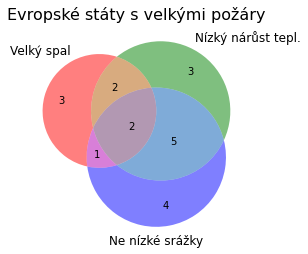

In [15]:
plt.figure(figsize=(6,4))
venn3([mnoz_velky_spal, mnoz_ne_velka_zmena_t, mnoz_ne_nizke_srazky],  
      set_labels=('Velký spal', 'Nízký nárůst tepl.', 'Ne nízké srážky'),
      alpha=0.5)
plt.title('Evropské státy s velkými požáry', fontsize=16)
plt.show()

* Naší motivací bylo najít průnik všech tří množin, znázorněný tmavo-fialově.
* Kombinací množinových operací UNION/INTERSECTION můžeme nalézt státy z ostatních podmnožin našeho Vénova diagramu
* Co logicky znamenají, a jsou potencionálně užitečné ambasadorovi při OSN?

---
---
## Porovnávání všech zemí najednou je nejspíš špatný nápad, vzhledem k jejich mnoha rozdílům.
* Opět neexistuje univerzální odpověď, jak státy seskupovat, zvažte například tyto možnosti:
  * Úroveň rozvoje (HDP)
  * Geografie
  * Klima
  * A mnoho dalších
* Zde vyzkouším rozdělení Států podle HDP na hlavu (per capita), pro porovnání požárů v podobně rozvinutých zemích
* Výše jsme porovnávali evropsé státy, což je možné díky malé velikosti evropy a integraci v rámci EU
---
---

## Jak tedy rozdělit státy dle HDP per capita?

In [16]:
# použitím modulu wb, můžeme do sešitu natáhnout tabulková data přímo ze Světové banky
hdp = wb.data.DataFrame('NY.GDP.PCAP.CD', time=2020)
hdp.index.names = ['iso']  # přejmenovat index
df = df.merge(hdp, on='iso')  # sjednotit tabulku hdp s naším df na základě identifikátoru 'iso' (index naší tabulky)

In [17]:
# přejmenovat hdp sloupec
df = df.rename(columns={'NY.GDP.PCAP.CD':'hdp_per_capita_dolary'})

In [18]:
df.head()

,Stat,Region,zmena_t,prum_srazky_mm_rok,plocha_lesa_ha,spal_plocha_ha,zlomek_spaleno,hdp_per_capita_dolary
iso,,,,,,,,
AFG,Afghanistan,Asia,1.11,327.0,5.150857e+08,3737.91,0.000007,508.808409
AGO,Angola,Africa,1.15,1010.0,9.979384e+08,802703.37,0.000804,1895.770869
ALB,Albania,Europe,1.65,1485.0,2.298830e+07,553.79,0.000024,5215.276752
ARG,Argentina,Americas,0.75,591.0,2.224081e+09,1283496.22,0.000577,8441.919439
ARM,Armenia,Asia,1.61,562.0,2.375207e+07,1776.87,0.000075,4267.452119


In [19]:
# Vypišme na ukázku, kolik dolarů na rok (a míň) musí v průměru vyjít lidé v 10% nejchhudších zemí?
# ANO, opět je to kvantil
df['hdp_per_capita_dolary'].quantile(0.1)

817.035756926923

In [20]:
# V dolarech na den
df['hdp_per_capita_dolary'].quantile(0.1)/365

2.238454128566912

## Pokud je člověk v extrémní chudobě, musí vyžít s méně než 2 dolary na den. 
* Jak píšeme v úvodu, svět se již nerozděluje na chudý jih a bohatý sever (jako v roce 1960), ale spíš do 4 různých úrovní bohatství
* Úrovně začínají na extémní chudobě s 2$ na den, a pak s násobky 4 následují další úrovně
* Takže dělící úrovně jsou 2, 8, 32 dolarů na den
* V jaké úrovni se nacházíš ty?

In [21]:
# Musíme tedy přidat ke každé zemi její úroveň hdp
# Nejdřív udělme všem zemím úroveň 4
df['hdp_uroven'] = 4

In [22]:
# Teď postupně projdeme df a pokud je hdp per capita nižší než .., snížíme úroveň o jedna
# hdp v tabulce je za rok, takže musíme úrovně násobit počtem dní v roce
df.loc[df['hdp_per_capita_dolary'] < 365*32, 'hdp_uroven'] = 3
df.loc[df['hdp_per_capita_dolary'] < 365*8, 'hdp_uroven'] = 2
df.loc[df['hdp_per_capita_dolary'] < 365*2.5, 'hdp_uroven'] = 1

In [23]:
# A je to
df.head()

,Stat,Region,zmena_t,prum_srazky_mm_rok,plocha_lesa_ha,spal_plocha_ha,zlomek_spaleno,hdp_per_capita_dolary,hdp_uroven
iso,,,,,,,,,
AFG,Afghanistan,Asia,1.11,327.0,5.150857e+08,3737.91,0.000007,508.808409,1
AGO,Angola,Africa,1.15,1010.0,9.979384e+08,802703.37,0.000804,1895.770869,2
ALB,Albania,Europe,1.65,1485.0,2.298830e+07,553.79,0.000024,5215.276752,3
ARG,Argentina,Americas,0.75,591.0,2.224081e+09,1283496.22,0.000577,8441.919439,3
ARM,Armenia,Asia,1.61,562.0,2.375207e+07,1776.87,0.000075,4267.452119,3


In [24]:
# Kolik Států (řádků) máme v df
len(df)

119

In [25]:
# Vynecháme státy, kde nějaké hodnoty chybí
# Profesionální by ovšem bylo najít dodatečné zdroje chybějících dat
df.dropna(inplace=True)

In [26]:
# Ze 195 států bohužel v naší studii ignorujeme mnoho lidí světa
len(df)

111

In [27]:
# Kolik zemí na té které HDP úrovni mamé v naší tabulce? 
# Najdeme pomocí metody value_counts(), kterou aplikujeme na sloupec hdp_uroven
df.hdp_uroven.value_counts()

3    40
4    29
2    27
1    15
Name: hdp_uroven, dtype: int64

# Analýza požárů pro státy úrovně 1
* Zde opakujeme přesně stejné kroky jako pro Evropu
* S výhodou že pracujeme se všemi státy světa, rozdělených dle HDP

In [28]:
df_l1 = df[df['hdp_uroven']==1]

In [29]:
# velké spáleniště
velky_spal_limit = df_l1.zlomek_spaleno.quantile(0.7)
velky_spal_df = df_l1[df_l1.zlomek_spaleno > velky_spal_limit]
mnoz_velky_spal = set(velky_spal_df.index)

In [30]:
# Státy, které netrpí přílišným nárůstem teploty
zmena_t_limit = df_l1.zmena_t.quantile(0.5)
ne_velka_zmena_t_df = df_l1[df_l1.zmena_t < zmena_t_limit] # opačné znamínko 
mnoz_ne_velka_zmena_t = set(ne_velka_zmena_t_df.index)

In [31]:
# Ne příliš nízké srážky
srazky_limit = df_l1.prum_srazky_mm_rok.quantile(0.5)
ne_nizke_srazky_df = df_l1[df_l1.prum_srazky_mm_rok > srazky_limit]
mnoz_ne_nizke_srazky = set(ne_nizke_srazky_df.index)

In [32]:
prunik2 = mnoz_velky_spal.intersection(mnoz_ne_velka_zmena_t)

In [33]:
df.loc[prunik2]

,Stat,Region,zmena_t,prum_srazky_mm_rok,plocha_lesa_ha,spal_plocha_ha,zlomek_spaleno,hdp_per_capita_dolary,hdp_uroven
iso,,,,,,,,,
MLI,Mali,Africa,1.08,282.0,9.800557e+08,2986561.72,0.003047,858.915805,1
TCD,Chad,Africa,1.10,322.0,9.050136e+08,1975335.80,0.002183,614.465190,1


In [34]:
prunik3 = mnoz_velky_spal.intersection(mnoz_ne_velka_zmena_t).intersection(mnoz_ne_nizke_srazky)

In [35]:
df.loc[prunik3]

,Stat,Region,zmena_t,prum_srazky_mm_rok,plocha_lesa_ha,spal_plocha_ha,zlomek_spaleno,hdp_per_capita_dolary,hdp_uroven
iso,,,,,,,,,


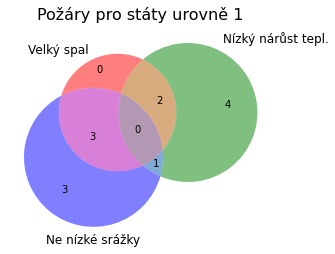

In [36]:
plt.figure(figsize=(6,4))
venn3([mnoz_velky_spal, mnoz_ne_velka_zmena_t, mnoz_ne_nizke_srazky],
      set_labels=('Velký spal', 'Nízký nárůst tepl.', 'Ne nízké srážky'),
      alpha=0.5)
plt.title('Požáry pro státy urovně 1', fontsize=16)
plt.show()

# Závěr pro úroveň 1:
* Zdá se, že žádný stát nevystupuje z řady, kdy by zaznamenal příliš požárů při mírném klimatu
* Požáry v Mali a Chadu se dají vysvětlit nízkými srážkami

# Analýza požárů pro státy úrovně 2

In [37]:
df_l2 = df[df['hdp_uroven']==2]

In [38]:
# velké spáleniště
velky_spal_limit = df_l2.zlomek_spaleno.quantile(0.7)
velky_spal_df = df_l2[df_l2.zlomek_spaleno > velky_spal_limit]
mnoz_velky_spal = set(velky_spal_df.index)

In [39]:
# Státy, které netrpí přílišným nárůstem teploty
zmena_t_limit = df_l2.zmena_t.quantile(0.5)
ne_velka_zmena_t_df = df_l2[df_l2.zmena_t < zmena_t_limit] # opačné znamínko 
mnoz_ne_velka_zmena_t = set(ne_velka_zmena_t_df.index)

In [40]:
# Ne příliš nízké srážky
srazky_limit = df_l2.prum_srazky_mm_rok.quantile(0.5)
ne_nizke_srazky_df = df_l2[df_l2.prum_srazky_mm_rok > srazky_limit]
mnoz_ne_nizke_srazky = set(ne_nizke_srazky_df.index)

In [41]:
prunik2 = mnoz_velky_spal.intersection(mnoz_ne_velka_zmena_t)

In [42]:
df.loc[prunik2]

,Stat,Region,zmena_t,prum_srazky_mm_rok,plocha_lesa_ha,spal_plocha_ha,zlomek_spaleno,hdp_per_capita_dolary,hdp_uroven
iso,,,,,,,,,
NIC,Nicaragua,Americas,1.09,2280.0,1.025758e+08,400918.61,0.003909,1905.256756,2
KHM,Cambodia,Asia,1.06,1904.0,1.450877e+08,929791.47,0.006408,1512.727753,2
VNM,Viet Nam,Asia,1.10,1821.0,2.634208e+08,2785125.25,0.010573,2785.724157,2


In [43]:
prunik3 = mnoz_velky_spal.intersection(mnoz_ne_velka_zmena_t).intersection(mnoz_ne_nizke_srazky)

In [44]:
df.loc[prunik3]

,Stat,Region,zmena_t,prum_srazky_mm_rok,plocha_lesa_ha,spal_plocha_ha,zlomek_spaleno,hdp_per_capita_dolary,hdp_uroven
iso,,,,,,,,,
NIC,Nicaragua,Americas,1.09,2280.0,1.025758e+08,400918.61,0.003909,1905.256756,2
KHM,Cambodia,Asia,1.06,1904.0,1.450877e+08,929791.47,0.006408,1512.727753,2
VNM,Viet Nam,Asia,1.10,1821.0,2.634208e+08,2785125.25,0.010573,2785.724157,2


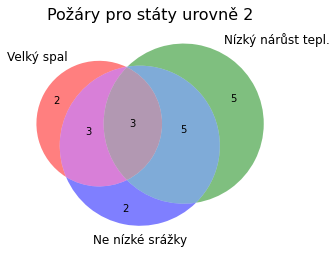

In [45]:
plt.figure(figsize=(6,4))
venn3([mnoz_velky_spal, mnoz_ne_velka_zmena_t, mnoz_ne_nizke_srazky],
      set_labels=('Velký spal', 'Nízký nárůst tepl.', 'Ne nízké srážky'),
      alpha=0.5)
plt.title('Požáry pro státy urovně 2', fontsize=16)
plt.show()

# Závěr pro úroveň 2:
* Nízké srážky neospravedlňují požáry v žádné zemi z prunik2 
* OSN ambasador by mohl zadat svým pracovníkům podívat se na tyto státy blíže.

# Analýza požárů pro státy úrovně 3

In [46]:
df_l3 = df[df['hdp_uroven']==3]

In [47]:
# velké spáleniště
velky_spal_limit = df_l3.zlomek_spaleno.quantile(0.7)
velky_spal_df = df_l3[df_l3.zlomek_spaleno > velky_spal_limit]
mnoz_velky_spal = set(velky_spal_df.index)

In [48]:
# Státy, které netrpí přílišným nárůstem teploty
zmena_t_limit = df_l3.zmena_t.quantile(0.5)
ne_velka_zmena_t_df = df_l3[df_l3.zmena_t < zmena_t_limit] # opačné znamínko 
mnoz_ne_velka_zmena_t = set(ne_velka_zmena_t_df.index)

In [49]:
# Ne příliš nízké srážky
srazky_limit = df_l3.prum_srazky_mm_rok.quantile(0.5)
ne_nizke_srazky_df = df_l3[df_l3.prum_srazky_mm_rok > srazky_limit]
mnoz_ne_nizke_srazky = set(ne_nizke_srazky_df.index)

In [50]:
prunik2 = mnoz_velky_spal.intersection(mnoz_ne_velka_zmena_t)

In [51]:
df.loc[prunik2]

,Stat,Region,zmena_t,prum_srazky_mm_rok,plocha_lesa_ha,spal_plocha_ha,zlomek_spaleno,hdp_per_capita_dolary,hdp_uroven
iso,,,,,,,,,
MEX,Mexico,Americas,1.12,758.0,1.561484e+09,1461080.92,0.000936,8346.702379,3
THA,Thailand,Asia,1.18,1622.0,4.112436e+08,3756909.35,0.009135,7189.041835,3
COL,Colombia,Americas,0.89,3240.0,9.094070e+08,2841056.56,0.003124,5332.773524,3
PRY,Paraguay,Americas,0.99,1130.0,3.196693e+08,937657.83,0.002933,4949.749700,3
BTN,Bhutan,Asia,1.05,2200.0,3.101037e+07,32671.79,0.001054,3122.376062,3
SLV,El Salvador,Americas,1.03,1784.0,1.633818e+07,58169.04,0.003560,3798.636521,3
GTM,Guatemala,Americas,1.05,1996.0,8.732079e+07,377429.44,0.004322,4603.339617,3
BLZ,Belize,Americas,1.08,1705.0,1.749727e+07,47339.90,0.002706,4435.621154,3


In [52]:
prunik3 = mnoz_velky_spal.intersection(mnoz_ne_velka_zmena_t).intersection(mnoz_ne_nizke_srazky)

In [53]:
df.loc[prunik3]

,Stat,Region,zmena_t,prum_srazky_mm_rok,plocha_lesa_ha,spal_plocha_ha,zlomek_spaleno,hdp_per_capita_dolary,hdp_uroven
iso,,,,,,,,,
THA,Thailand,Asia,1.18,1622.0,4.112436e+08,3756909.35,0.009135,7189.041835,3
COL,Colombia,Americas,0.89,3240.0,9.094070e+08,2841056.56,0.003124,5332.773524,3
PRY,Paraguay,Americas,0.99,1130.0,3.196693e+08,937657.83,0.002933,4949.749700,3
BTN,Bhutan,Asia,1.05,2200.0,3.101037e+07,32671.79,0.001054,3122.376062,3
SLV,El Salvador,Americas,1.03,1784.0,1.633818e+07,58169.04,0.003560,3798.636521,3
GTM,Guatemala,Americas,1.05,1996.0,8.732079e+07,377429.44,0.004322,4603.339617,3
BLZ,Belize,Americas,1.08,1705.0,1.749727e+07,47339.90,0.002706,4435.621154,3


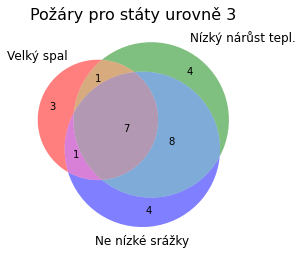

In [54]:
plt.figure(figsize=(6,4))
venn3([mnoz_velky_spal, mnoz_ne_velka_zmena_t, mnoz_ne_nizke_srazky],
      set_labels=('Velký spal', 'Nízký nárůst tepl.', 'Ne nízké srážky'),
      alpha=0.5)
plt.title('Požáry pro státy urovně 3', fontsize=16)
plt.show()

# Závěr pro úroveň 3:
* Nízké srážky vyřadily pouze Mexico.
* OSN ambasador by se mohl blíže zaměřit na těchto 7 států.

# Analýza požárů pro státy úrovně 4

In [81]:
df_l4 = df[df['hdp_uroven']==4]

In [82]:
# velké spáleniště
velky_spal_limit = df_l4.zlomek_spaleno.quantile(0.7)
velky_spal_df = df_l4[df_l4.zlomek_spaleno > velky_spal_limit]
mnoz_velky_spal = set(velky_spal_df.index)

In [83]:
# Státy, které netrpí přílišným nárůstem teploty
zmena_t_limit = df_l4.zmena_t.quantile(0.5)
ne_velka_zmena_t_df = df_l4[df_l4.zmena_t < zmena_t_limit] # opačné znamínko 
mnoz_ne_velka_zmena_t = set(ne_velka_zmena_t_df.index)

In [84]:
# Ne příliš nízké srážky
srazky_limit = df_l4.prum_srazky_mm_rok.quantile(0.5)
ne_nizke_srazky_df = df_l4[df_l4.prum_srazky_mm_rok > srazky_limit]
mnoz_ne_nizke_srazky = set(ne_nizke_srazky_df.index)

In [85]:
prunik2 = mnoz_velky_spal.intersection(mnoz_ne_velka_zmena_t)

In [86]:
df.loc[prunik2]

,Stat,Region,zmena_t,prum_srazky_mm_rok,plocha_lesa_ha,spal_plocha_ha,zlomek_spaleno,hdp_per_capita_dolary,hdp_uroven
iso,,,,,,,,,
PAN,Panama,Americas,0.88,2928.0,6.008336e+07,164219.79,0.002733,12269.048996,4
AUS,Australia,Oceania,1.11,534.0,6.150331e+09,6922165.61,0.001125,51812.154037,4
TTO,Trinidad and Tobago,Americas,0.74,2200.0,4.127197e+06,2488.69,0.000603,15384.039461,4
CHL,Chile,Americas,0.56,1522.0,6.058823e+08,247340.21,0.000408,13231.704207,4
CRI,Costa Rica,Americas,0.93,2926.0,4.094133e+07,138181.27,0.003375,12076.814514,4


In [87]:
prunik3 = mnoz_velky_spal.intersection(mnoz_ne_velka_zmena_t).intersection(mnoz_ne_nizke_srazky)

In [88]:
df.loc[prunik3]

,Stat,Region,zmena_t,prum_srazky_mm_rok,plocha_lesa_ha,spal_plocha_ha,zlomek_spaleno,hdp_per_capita_dolary,hdp_uroven
iso,,,,,,,,,
CHL,Chile,Americas,0.56,1522.0,6.058823e+08,247340.21,0.000408,13231.704207,4
TTO,Trinidad and Tobago,Americas,0.74,2200.0,4.127197e+06,2488.69,0.000603,15384.039461,4
CRI,Costa Rica,Americas,0.93,2926.0,4.094133e+07,138181.27,0.003375,12076.814514,4
PAN,Panama,Americas,0.88,2928.0,6.008336e+07,164219.79,0.002733,12269.048996,4


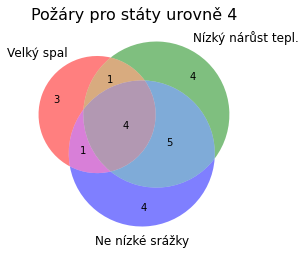

In [89]:
plt.figure(figsize=(6,4))
venn3([mnoz_velky_spal, mnoz_ne_velka_zmena_t, mnoz_ne_nizke_srazky],
      set_labels=('Velký spal', 'Nízký nárůst tepl.', 'Ne nízké srážky'),
      alpha=0.5)
plt.title('Požáry pro státy urovně 4', fontsize=16)
plt.show()

# Závěr pro úroveň 4:
* Centrální Amerika se zdá může vylepšit svou situaci s lesními požáry.
* Nebo se jedná o něco specifického pro daný region?
* Netroufám si odpovědět, dejte mi vědět vaše nápady

# Závěr:
* Ukázali jsme si v tomto cvičení mnoho, zejména užitečnost modulu pandas a DataFramů při práci s tabulkovými daty.
* A to vše s daty z reálného světa, které jsme zkombinovaly z různých zdrojů
* Jako život sám, je tato úloha otevřená, nemá jasnou odpověď a mnoho se dá vylepšit
* Pokud máte nápady, kam tuto metodu posunout, dotoho, můžete zachránit životy. 
---
# Dobrá práce!!!